# 1. Introduction

In this notebook, we will examine the relationship between life expectancy and GDP for a selection of countries.

First, we import the libraries Pandas, Pyplot and Seaborn in order to read, analyze and visualize the data:

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# 2. Read in and inspect data

We read the data provided in the CSV file into a DataFrame using Pandas and print the first few lines:

In [3]:
data = pd.read_csv('all_data.csv')

In [4]:
print(data.head(20))

   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014         

We inspect the column names to check if there are any trailing spaces:

In [12]:
print(data.columns)

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


We rename the column name for the life expectancy as it is too long:

In [13]:
data = data.rename(columns = {'Life expectancy at birth (years)' : 'Life expectancy'})

## 2.2 Summary statistics

Now that we have an idea of what kind of data our dataset contains, we want to examine it in more detail.
First, we want to now the number of observations:

In [15]:
print(len(data))

96


We want to see for which years we have data:

In [16]:
print(data.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


As we can only see two countries in the preview, we list the distinct countries appearing in the "Country" column:

In [17]:
print(data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


This matches the number of observations: 6 countries with 16 observations each, giving 96 data points.

We can also use the .describe method in order to get a statistical summary of the numerical columns:

In [14]:
print(data.describe())

              Year  Life expectancy           GDP
count    96.000000        96.000000  9.600000e+01
mean   2007.500000        72.789583  3.880499e+12
std       4.633971        10.672882  5.197561e+12
min    2000.000000        44.300000  4.415703e+09
25%    2003.750000        74.475000  1.733018e+11
50%    2007.500000        76.750000  1.280220e+12
75%    2011.250000        78.900000  4.067510e+12
max    2015.000000        81.000000  1.810000e+13


We see that for life expectancy, in our dataset the average is 72.8 years and the median is 76.75 years. This indicates that the distribution of life expectancy is right-skewed. The minimum of 44.3 years is significantly lower than even the first quartile and represents an outlier.
The analysis for GDP is similar, reflecting an uneven distribution among the data: an average of 3.8 trillion US$ and a median of 1.28 trillion USD, with a minimum of 4.4 billion USD, three orders of magnitude lower.

# 3. First plots of the data

## 3.1 Life expectancy by year

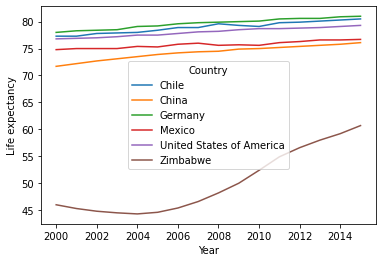

In [18]:
sns.lineplot(data= data, x = 'Year', y = 'Life expectancy', hue = 'Country')
plt.show()

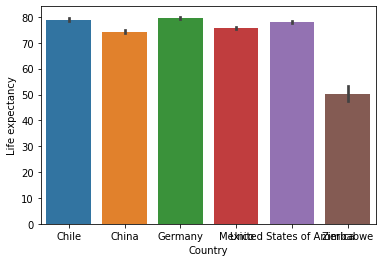

In [19]:
sns.barplot(data=data, x='Country', y='Life expectancy')
plt.show()

## 3.2 GDP by year

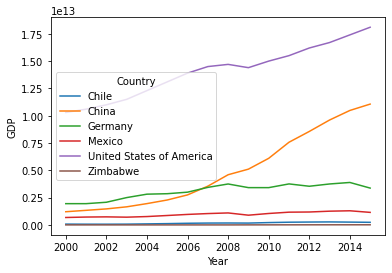

In [20]:
sns.lineplot(data=data, x= 'Year', y= 'GDP', hue= 'Country')
plt.show()

Since the GDPs are so vastly different, it might be advantageous to plot GDP on a logarithmic scale:

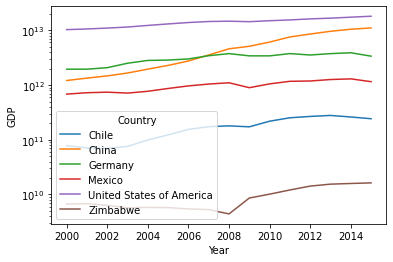

In [21]:
line = sns.lineplot(data=data, x= 'Year', y= 'GDP', hue= 'Country')
line.set(yscale="log")
plt.show()

# 4. Univariate Analysis

## 4.1 Life expectancy by country

Compute the average life expectancy by country:

In [22]:
average_life_expectancy = data.groupby('Country')['Life expectancy'].mean()
print(average_life_expectancy)

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life expectancy, dtype: float64


## 4.2 Life expectancy by year

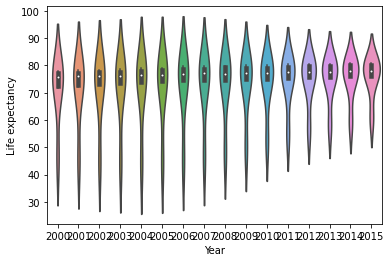

In [24]:
sns.violinplot(data=data, x='Year', y='Life expectancy')
plt.show()

In [ ]:
The violin plots seem to be very sensitive to the 

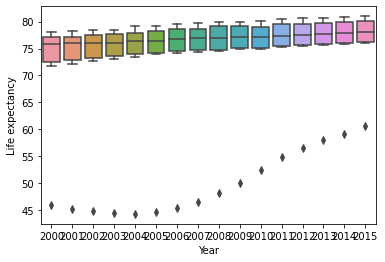

In [25]:
sns.boxplot(data=data, x='Year', y='Life expectancy')
plt.show()

In [23]:
average_gdp = data.groupby('Country').GDP.mean()
print(average_gdp)

Country
Chile                       1.697888e+11
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
United States of America    1.407500e+13
Zimbabwe                    9.062580e+09
Name: GDP, dtype: float64


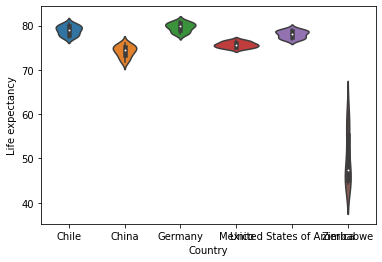

In [26]:
sns.violinplot(data=data, x='Country', y='Life expectancy')
plt.show()

# 5. Multivariate Anaylsis

Is there a correlation between GDP and life expectancy?

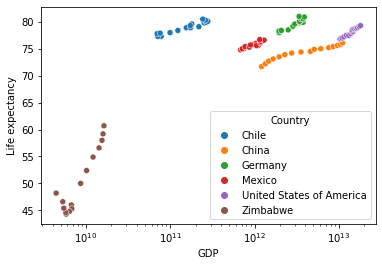

In [27]:
sc = sns.scatterplot(x='GDP', y= 'Life expectancy', data = data, hue = 'Country')
sc.set(xscale="log")
plt.show()

We compute Pearson's correlation coefficient R to measure the correlation of these two variables and whether this correlation is statistically significant:

In [28]:
from scipy.stats import pearsonr

r, pval = pearsonr(data.GDP, data['Life expectancy']) 
print('Pearson\'s correlation coefficient r: {}'.format(r))
print('p-value: {}'.format(pval))
result = ('signficiant' if pval < 0.05 else 'not significant')
print('The result is ' + result)

Pearson's correlation coefficient r: 0.343206748449156
p-value: 0.0006187129569469811
The result is signficiant


<AxesSubplot:>

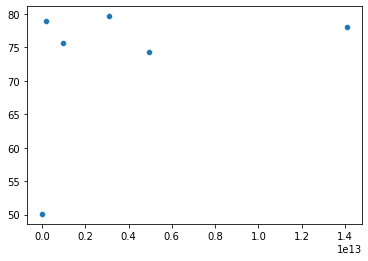

In [29]:
sns.scatterplot(x = average_gdp.values, y = average_life_expectancy.values)